# Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read & Check Data

In [2]:
#Read the data
org_df = pd.read_csv('Dataset/Bengaluru_House_Data.csv')
df = org_df.copy()
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#number of rows and columns of df_train dataset
df.shape

(13320, 9)

In [4]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
#mathematical overview of the numerical data
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
# mathematical overview of the object data
df.describe(include="object")

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


C:\Users\DELL\AppData\Local\Temp\ipykernel_19396\407540721.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

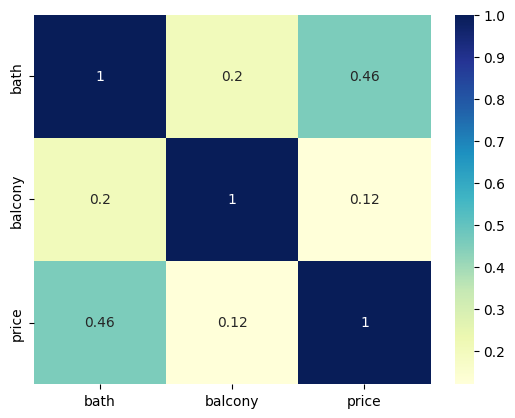

In [7]:
#correlation
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

from above information, balcony column has very less correlation with price and bath so, we can remove this column

In [8]:
#Number of unique values
for feature in df:
    print(f"{feature}",df[feature].nunique())

area_type 4
availability 81
location 1305
size 31
society 2688
total_sqft 2117
bath 19
balcony 4
price 1994


# Data Cleaning

In [9]:
#Percentage of missing values
df.isnull().sum()*100/df.shape[0]

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

from above information, society column has more than 30% of missing values so, we can remove this column
and other can be filled with mean, mode or simply drop those rows.

In [10]:
#removing columns
df = df.drop(['society','balcony','area_type','availability'],axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
#Shape of the dataset
df.shape

(13320, 5)

In [12]:
#droping missing values
df=df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
#Shape after droping missing values
df.shape

(13246, 5)

In [14]:
df2=df.copy()
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

As we can see here, there are some unstructured data here.

In [15]:
#Extract all unstructured data
def is_float(x):
    try:
        float(x) # converting a value into float
    except:
        return False # it will return unstructured data
    return True

In [16]:
#returns all the values with unstructed data
#The negation operator in Python is not.
#It reverse the truth value of its operand
df2[~df2['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800


for range values(e.g., 2100 - 2850) in total_sqft we will take its average value.

In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df3=df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3=df3[df3.total_sqft.notnull()]
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,51.00


# EDA

In [19]:
#import pandas_profiling
#import ydata_profiling
#pandas_profiling.ProfileReport(df3)

From above we can say,<br>
price is highly overall correlated with total_sqft<br>
total_sqft is highly overall correlated with bath<br>
bhk is highly overall correlated with total_sqft<br>

In [20]:
df3.shape

(13200, 5)

# Feature Engineering

In [21]:
#Unique values in size column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

As you can see here, BHK (The term BHK is the acronym for 'Bedroom, Hall, Kitchen') and bedroom somewhat refer to same thing so, we will make a new column which will have only number.

In [22]:
#Spliting a string values in the specfic column
df3['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
#convert datatype of bath from float to int
df3=df3.astype({'bath':'int'})
df3.shape

(13200, 6)

In [24]:
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000


We know that in real estate market <b>price per square feet</b> is very important, but we didn't have this in our dataset so, we have to create this column <i>(for outlier detection)</i>.<br>
<i>(we multiplied 100000 in above equation because the price is in lakh rupess.)</i>

In [25]:
# total number of unique values in column location
df3['location'].nunique()

1298

In [26]:
#to remove extra spaces 
df3['location']=df3['location'].apply(lambda x:x.strip())

In [27]:
location_stats = df3['location'].value_counts()
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [28]:
#location_stats that have less than 10 values
len(location_stats[location_stats<=10])

1047

As we can see here, in the column location there are too many unique categorical values which will create a dimensionality problem in future so, we need to take most frequent variables and other remaning categories will be transformed into completely new category that can be named as 'others'.

In [29]:
#All categories in location_stats that have less than 10 values
location_stats_lessthan_10=location_stats[location_stats<=10]
location_stats_lessthan_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [30]:
# Categories all the values that have less than 10 values in location column
df3['location']=df3.location.apply(lambda x:'Other' if x in location_stats_lessthan_10 else x)

In [31]:
#Number of unique values in location column
df3['location'].nunique()

241

# Outlier

The average size of a master bedroom is 14 x 16 feet. It may be bigger than that but 300 square footage is a minimum.

In [32]:
#outliers
df3[df3.total_sqft/df3.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Other,6 Bedroom,1020.0,6,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3,100.0,3,20000.000000


In [33]:
df.shape

(13246, 5)

In [34]:
#removing outliers
df4 = df3[~(df3.total_sqft/df3.bhk<300)]

In [35]:
#shape after removing outliers
df4.shape

(12456, 7)

In [36]:
#mathematical overview of the price_per_sqft
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

As we can see here, that the minimum value of price_per_sqft is 267, but in bengaluru getting 267 price per sqft is very low so, it may be a outlier.<br>
And the maximum value of price_per_sqft is 176470 which can be possible for prime area but here we are building a generic model it makes sense to remove this kind of extreme cases.

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft) #mean of the price_per_sqft
        st = np.std(subdf.price_per_sqft) #standard deviation of the price_per_sqft
        # below code includes only the data points where price_per_sqft is greater than the mean minus one standard deviation (m-st) AND less than or equal to the mean plus one standard deviation (m+st)
        #Why we are doing this?
        #removing outliers from the sub-dataframe based on the price per square foot (price_per_sqft) column. 
        #This step is important because outliers can significantly impact the statistical properties of a dataset and 
        #can lead to inaccurate machine learning models.
		#The code identifies outliers as any data point that falls outside of one standard deviation from 
        #the mean of the price_per_sqft column. 
        #By doing so, it removes any data points that are significantly higher or lower than the average price per square foot in a particular location.
		#For example, let's say the average price per square foot in a particular location is $100, 
        #and the standard deviation is $10. Any data point with a price per square foot greater than $110 or less than $90 
        #would be considered an outlier and would be removed from the sub-dataframe.
		#By removing outliers, the code is ensuring that the sub-dataframe only contains data points 
        #that are representative of the typical prices for a particular location. This helps to create more accurate and reliable machine learning models.
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [38]:
df5 = remove_pps_outliers(df4)
#shape after removing outliers
df5.shape

(10242, 7)

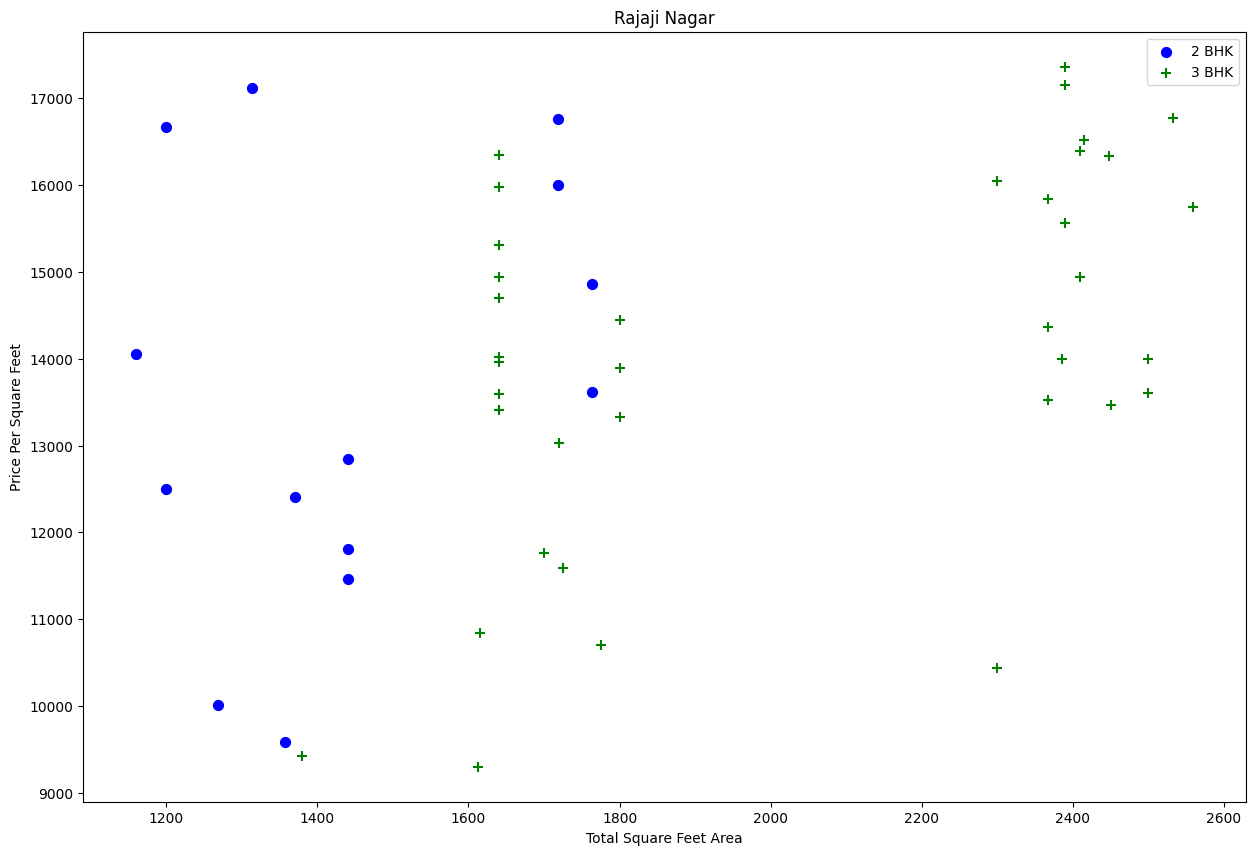

In [39]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df5,"Rajaji Nagar")    

From above visualization, we can see that in some cases 2BHK has more price than 3BHK for the same square feet area they can be considered as outliers
so, we will deal with them in outlier section.

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats= bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [41]:
df6 = remove_bhk_outliers(df5)
#shape after removing outliers
df6.shape

(7317, 7)

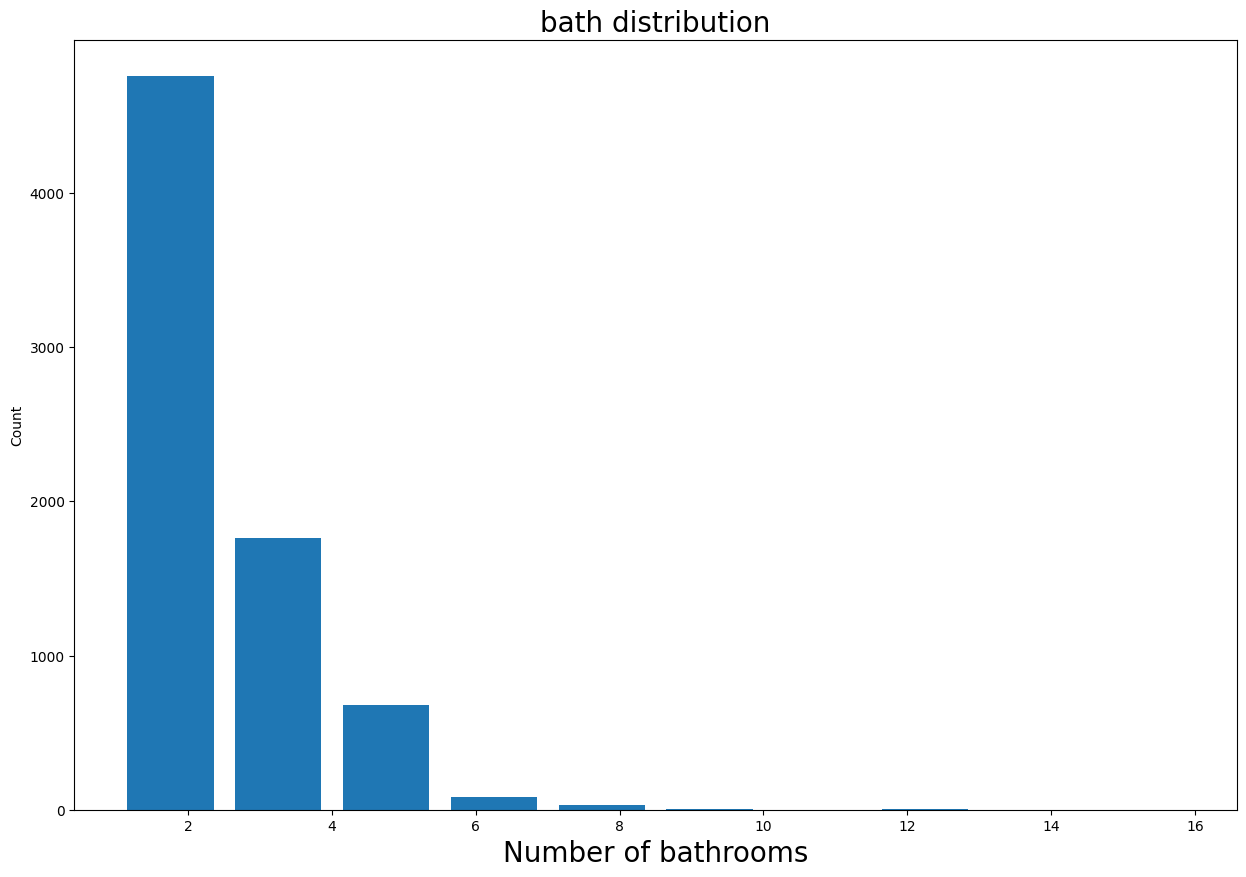

In [42]:
plt.hist(df6['bath'],rwidth=0.8)
plt.title('bath distribution',fontsize=20)
plt.xlabel('Number of bathrooms',fontsize=20)
plt.ylabel('Count')
plt.show()

Here, we can see that there are some outliers where there are more number of bathrooms.<br>
As we know that the number of bathroom wouldn't be greater than number of bedrooms but sometimes we can have number of bathroom+2 for the number of bedrooms but more than it will be unusual.

In [43]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8,450.0,4,6428.571429
5851,Other,6 BHK,11338.0,9,1000.0,6,8819.897689
9017,Thanisandra,3 BHK,1806.0,6,116.0,3,6423.034330


In [44]:
df7=df6[df6.bath<df6.bhk+2]
df7.shape

(7239, 7)

In [45]:
#drop unnecessary features
df8=df7.drop(['size','price_per_sqft'],axis=1)
df8.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4,428.0,4
1,1st Block Jayanagar,1630.0,3,194.0,3
2,1st Block Jayanagar,1875.0,2,235.0,3
3,1st Block Jayanagar,1200.0,2,130.0,3
4,1st Block Jayanagar,1235.0,2,148.0,2


Here we droped size as we already have bhk column replacing it and price_per_sqft as we created it for just outlier detection.<br>
location column is in categorical as we know that machine learning algorithm do not works well with categorical features so we need to convert it to numerical feature.

In [46]:
#number of unique values in location
df8.location.nunique()

241

In [47]:
#text to numerical data-one hot encoding
dummies=pd.get_dummies(df8.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#Combining are actual dataframe and dummies dataframe
df9=pd.concat([df8,dummies.drop('Other',axis=1)],axis=1)

In [49]:
#drop unnecessary features
df10=df9.drop('location',axis=1)
df10.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df10.shape

(7239, 244)

# Model Building

In [51]:
# x will be have only independent features
X=df10.drop('price',axis=1)
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# y will be have only dependent features
y=df10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [53]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [54]:
#model building
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.8697077447864892

In [55]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.7928690259566021

In [56]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf = clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7089193750220273

In [57]:
#K fold cross validation 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

print("Linear regression:",cross_val_score(LinearRegression(), X, y, cv=cv))
print("Lasso regression:",cross_val_score(Lasso(), X, y, cv=cv))
print("Decision tree regression:",cross_val_score(DecisionTreeRegressor(), X, y, cv=cv))

Linear regression: [0.85828778 0.84336113 0.79796392 0.83935442 0.87210932]
Lasso regression: [0.70689853 0.71619384 0.64163502 0.76672782 0.71737303]
Decision tree regression: [0.73159001 0.53136684 0.69874344 0.60601341 0.75378758]


##### GridSearchCV to find the best Model

In [58]:
from sklearn.model_selection import GridSearchCV

#from sklearn.linear_model import Lasso
#from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
               
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", lin

,model,best_score,best_params
0,linear_regression,0.842215,{}
1,lasso,0.709766,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.703256,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

#### Test the model for few properties

In [59]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return reg.predict([x])[0]

In [60]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.97216916107216

In [61]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.97315456416713

In [62]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.54832393552277

In [63]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.54930933861775

#### Export the tested model to a pickle file

In [64]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(reg,f)

##### Export location and column information to a file that will be useful later on in our prediction application

In [65]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [66]:
pip freeze >requirement.txt

Note: you may need to restart the kernel to use updated packages.
